<a href="https://colab.research.google.com/github/hburnt/Machine-Learning/blob/main/intro_to_ml/Homework_2/Intro_to_ML_HW2_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [866]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/Housing.csv'

#Adding in the dummy column of 1's for X0
df = pd.DataFrame(pd.read_csv(url))
X0 = np.ones((len(df)))
X0 = pd.DataFrame(X0, columns = ['X0'])
df = pd.concat([pd.DataFrame(X0), df], axis = 1)

In [867]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
def binary_map(x):
  return x.map({'yes': 1, 'no':0, 'furnished': 1, 'semi-furnished':0.5, 'unfurnished': 0})
df[varlist] = df[varlist].apply(binary_map)

# **Problem 1.a**

In [868]:
#------------- Implimenting the 80% training set and 20% evaluatiuon(test) set
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [869]:
from scipy.sparse.linalg._eigen import test
#--------------- Deteriming the inputs/outputs for Problem 1.a ---------------#

# Training Inputs/Outputs
training_inputs = df_train[["X0","area","bedrooms", "bathrooms", "stories", "parking"]]
training_outputs = df_train[["price"]]

training_inputs1b = df_train[["X0","area","bedrooms", "bathrooms", "stories","mainroad", "guestroom", "basement","hotwaterheating", "airconditioning" ,"parking","prefarea"]]
training_outputs1b = df_train[["price"]]

# Test Inputs/Outputs
test_inputs = df_test[["X0", "area","bedrooms", "bathrooms", "stories", "parking"]]
test_outputs = df_test[["price"]]

test_inputs1b = df_test[["X0","area","bedrooms", "bathrooms", "stories","mainroad", "guestroom", "basement","hotwaterheating", "airconditioning" ,"parking","prefarea"]]
test_outputs1b = df_test[["price"]]

m = len(training_inputs)

## Converting the test and validation data frames in numpy arrays
train_output = np.asarray(training_outputs)
train_input = np.asarray(training_inputs)

train_output1b = np.asarray(training_outputs1b)
train_input1b = np.asarray(training_inputs1b)

test_output = np.asarray(test_outputs)
test_input = np.asarray(test_inputs)

test_output1b = np.asarray(test_outputs1b)
test_input1b = np.asarray(test_inputs1b)

In [870]:
def trainingCostFunc(length, error):
  cost = ( (1)/(2*length)) * np.sum( np.square(error))
  return cost

In [871]:
#----------------- Gradient Descent Function -----------------#
def gradient_descent(inputs, outputs, theta, learningRate, iterations):
  data_loss = np.zeros(iterations)
  length = len(outputs)

  for i in range(iterations):
    predicted_values = inputs.dot(theta)
    error = np.subtract(predicted_values, inputs)
    gradients = (1/length) * ( inputs.transpose().dot(error))
    theta = theta - (learningRate * gradients)
    data_loss[i] = trainingCostFunc(length, error)

  return theta, data_loss

<ipython-input-870-e908470bd559>:2: RuntimeWarning: overflow encountered in square
  cost = ( (1)/(2*length)) * np.sum( np.square(error))
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-871-df8c06f6bf43>:10: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (learningRate * gradients)


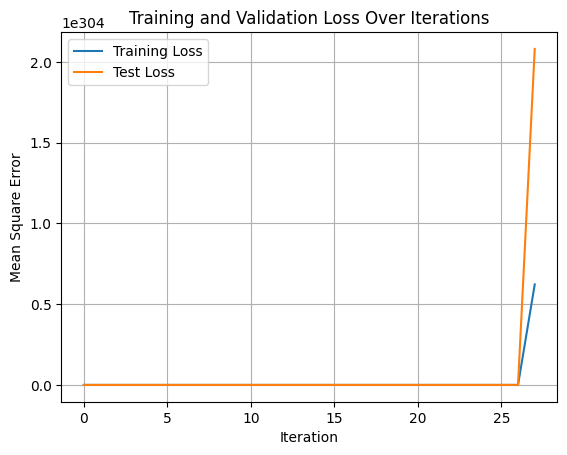

In [872]:
#Calculating the gradient descent for 6 inputs without any pre-processing
training_theta = np.zeros((6,1))
learningRate = 0.01
iterations = 1000

training_theta, training_loss = gradient_descent(train_input, train_output, training_theta, learningRate, iterations)

test_theta = np.zeros((6,1))
test_theta, test_loss = gradient_descent(test_input, test_output, test_theta, learningRate, iterations)

plt.grid(True)
plt.plot(training_loss, label = 'Training Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Square Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

## **Problem 1.b**

<ipython-input-870-e908470bd559>:2: RuntimeWarning: overflow encountered in square
  cost = ( (1)/(2*length)) * np.sum( np.square(error))
<ipython-input-871-df8c06f6bf43>:10: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (learningRate * gradients)


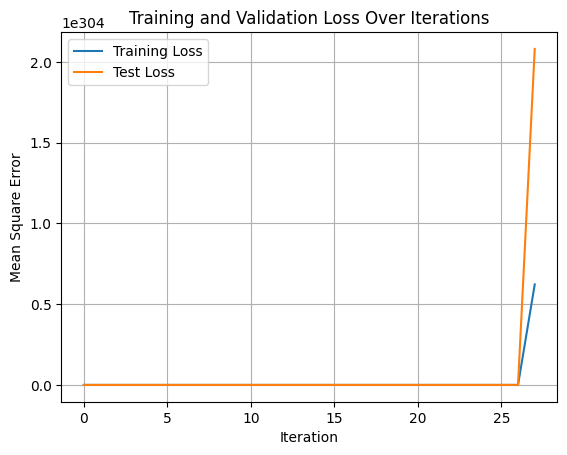

In [873]:
#Claculating the gradient descent for 12 inputs without any pre-processing
training_theta = np.zeros((12,1))
test_theta = np.zeros((12,1))

training_theta, training_loss = gradient_descent(train_input1b, train_output1b, training_theta, learningRate, iterations)
test_theta, test_loss = gradient_descent(test_input1b, test_output1b, test_theta, learningRate, iterations)

plt.grid(True)
plt.plot(training_loss, label = 'Training Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Square Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Notice how the loss increases when we do not pre-process the data. The prices are very large so their features will result in a very scewed loss